# Discretization of a function of a single variable. Differentiation through finite differences.

## 1 – Code to represent the function and the analytical and numerical derivative.

Consider the function

$$h(x) = \cos\left[\frac{\pi (x-1)}{2}\right] \exp\left[-\left(\frac{x-3}{2.5}\right)^2\right],\tag{1}$$

with $x \in (-4,10) $.

Let us define a sampling of $h$ with 64 intervals, that is, 65 points, and store the
values into double precision arrays called $xx$ and $hh$. Numpy arrays are double precision as 
default. To define $xx$ in Python you can use the commands:

`import numpy as np
nump=65
x0=-4.0 
xf=10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0`

Use `matplotlib.pyplot` to visualize hh vs xx. 

Define the variable $nint$ as the number of intervals ($nint= 64$ in the present case)
and $nump$ as the number of points. In IDL, Python and C, those components go
from the $0-$component through the component $nump−1$. Compute the ratio (1) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization) using and filling the function `deriv_dnw` in `nm_lib`. Feel free to use any known library or create your own functions from scratch. 

It will depend on how you created the function that you have $nump$ or $nump−1$ elements. If the former, the last component ($nump-1$) is ill calculated. $hp$ contains a second-order approximation to the derivative of the $hh$ function at the intermediate points $x_{i+1/2}$.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from nm_lib import nm_lib as nm
#Creating name db for float64 to save space. 64bit = double point precision.
db = np.float64

<span style="color:green">JMS</span>.

<span style="color:yellow">very minor comment, if the machine is 64 bits it will probably be float64 as deafult</span>.

## Tasks:

1. Plot $hh$ versus $xx$ as a solid line with crosses added at each grid point (to visualize the goodness of the discretization) or with `plt.hist` function combined with `plt.plot`. _Make sure the axis pixels are properly located either to the center or half grid shifted_

In [2]:
def h(x):
    """This is function h(x) from eq. (1)"""
    return np.cos(np.pi * (x-db(1))/db(2)) * np.exp(-((x-db(3))/db(2.5))**2)

def dh_dx(x):
    """Derivative of h(x) w.r.t. x."""
    a = np.pi/db(2)
    b = db(2.5)
    return (np.exp(-(x - db(3))**2/b**2) * (a * b**2* np.sin(a - a *x) - db(2) *(x - db(3)) *np.cos(a *(x - db(1)))))/b**2

def get_xx_hh_dx(nump, x0, xf):
    """This function creates the array of gridpoints for x. Then solves h(x) and creates a
       delta x. And this is xx[1]-xx[0] because it is the same for all of the grid."""
    xx = np.arange(nump)/(nump-db(1.0)) * (xf-x0) + x0
    hh = h(xx)
    dx = np.abs(xx[1] - xx[0])
    return xx, hh, dx

2. Plot the array containing the numerical derivative, $hp$. Calculate analytically the derivative of the function (1) and represent it in the same figure to ascertain the goodness of the approximation for that number of points. __hint__ _make sure the axis pixels are properly located either to the center or half grid shifted_. 

In [3]:
def calculate_derivative(xx, hh, dx):
    """Return numerical and analytical
       ha analytic, hp numerical
    """
    dx = np.roll(xx,-1) - xx
    
    hp = nm.deriv_dnw(xx, hh, **{"ddx_order":1})
    ha = dh_dx(xx + dx/2)
    return hp, ha

In [4]:
#using get_xx_hh_dx function to get variables for different grid sizes, 16, 32, and 64 size grids.
xx_16, hh_16, dx_16 = get_xx_hh_dx(nump=16, x0=db(-4.0), xf=db(10.0))
xx_32, hh_32, dx_32 = get_xx_hh_dx(nump=32, x0=db(-4.0), xf=db(10.0))
xx_64, hh_64, dx_64 = get_xx_hh_dx(nump=64, x0=db(-4.0), xf=db(10.0))

In [5]:
def binplot(xx, hh, dx):
    """This function creates the histogram vs the function on the left
       and analytical derivative vs numerical on the right."""
    counts, bins = np.histogram(hh)

    fig, ax = plt.subplots(1,2, figsize=(8,4))
    ax[0].set_title("Function")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("h(x)")
    ax[0].step(xx + dx/db(2), hh, label="Bins")
    ax[0].plot(xx, hh, "x-", label="Func")
    ax[0].legend()
    
    hp, ha = calculate_derivative(xx, hh, dx)
    ax[1].set_title("Derivative")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("dh/dx")
    ax[1].plot(xx, hp, "x", label="Numerical")
    ax[1].plot(xx, ha, label="Analytical")
    ax[1].legend()

    fig.tight_layout()

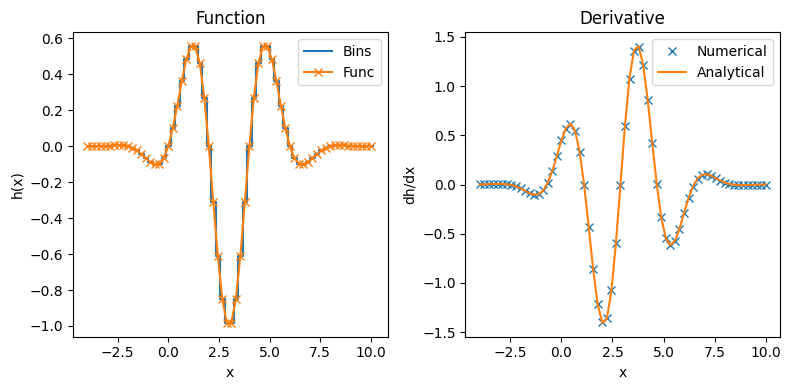

In [6]:
binplot(xx_64, hh_64, dx_64)

<span style="color:green">JMS</span>.

<span style="color:blue">Good</span>.


In the first plot we see h(x) as described in equation (1). This is discretized so we have plotted the bins to show this. In the right plot I have taken the first order downwind derivative on h(x) and also calculated the analytical dhdx and given this the gridspace as an argument. We had to shift the bins by a half step to make the middle of the gridpoint match the function. This also had to be done for the analytical derivative.

3. Repeat the foregoing, but now using $nint= 32$ and $nint= 16$ intervals to see how the approximation deteriorates. Thereafter, repeat the same process for 128 and 256 intervals, to see how it improves. Consider to use `plt.semilogy` for the error. 

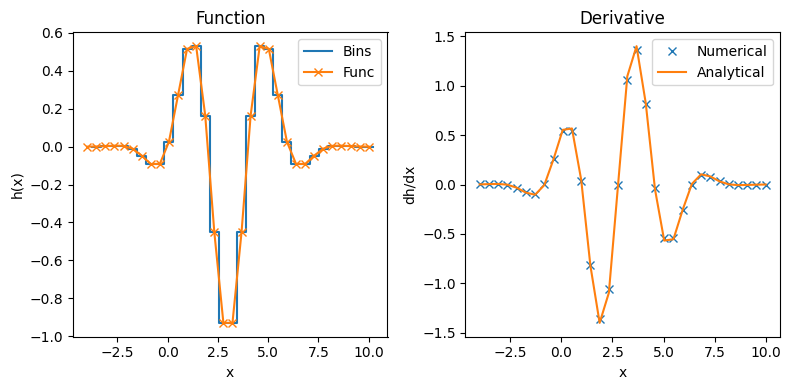

In [7]:
binplot(xx_32, hh_32, dx_32)

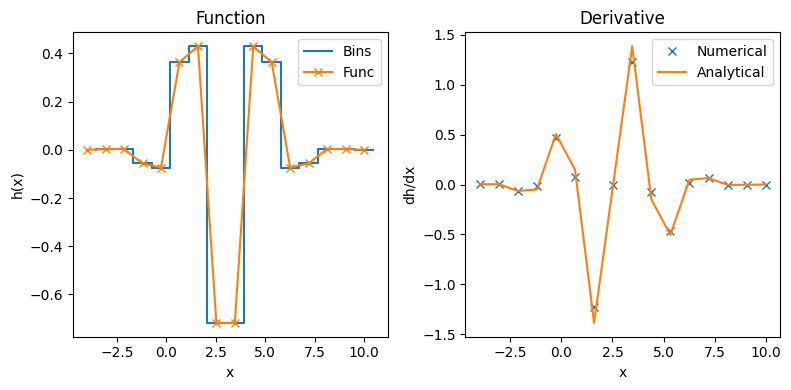

In [8]:
binplot(xx_16, hh_16, dx_16)

<span style="color:green">JMS</span>.

<span style="color:blue">Good</span>.

The steps done are the same as in the first plot but now we have lowered the resolution. In the first plot we had 64 gridpoints and now we have gone down to 32 and finally 16. We can see that the derivative get's a little more off the more we lower the resolution. Expecially at the extreme points.

## 2- Test of the quadratic order of the approximation.

We are going to test if the ratio $(h_{i+1}-h_i)/(x_{i+1}-x_i)$ approaches the analytical value of the derivative. To that end, we will use samplings with, successively, 16, 32, 64, 128, 256, 512 and 1024 intervals (which are successive powers of 2). Calculate the maximum of the absolute value of the error, meaning: the difference between the analytical and the numerical derivatives at the _same points_. Plot a graph of that value versus the size of the interval in each case using a diagram with logarithmic axes. Check if the curve you get corresponds to a quadratic dependence.

(1e-08, 0.2)

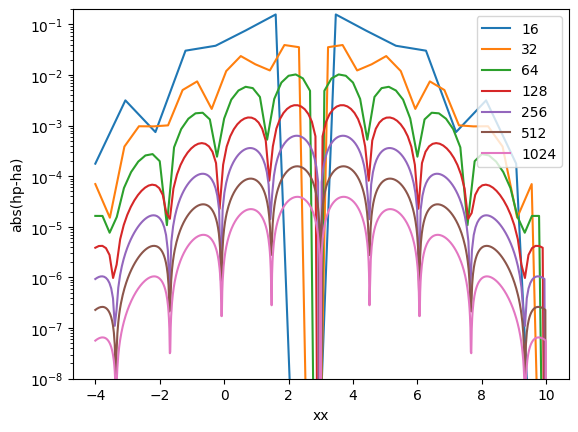

In [9]:
#We create a list of nint to go trough and append the error values for all of these. The error is the sum of the
#absolute values between the analytical and numerical derivative.
ntests = [16, 32, 64, 128, 256, 512, 1024]
errors = []

for ntest in ntests:
    xx, hh, dx = get_xx_hh_dx(nump=ntest, x0=db(-4.0), xf=db(10.0))
    hp, ha = calculate_derivative(xx, hh, dx)
    plt.semilogy(xx, np.abs(hp-ha), label=str(ntest))
    errors.append(np.mean(np.abs(hp-ha)))
plt.xlabel("xx")
plt.ylabel("abs(hp-ha)")
plt.legend()
plt.ylim((1e-8,2e-1))

<span style="color:green">JMS</span>.

<span style="color:blue">Good</span>.

Here I have plotted the absolute value between the analytical solution and the numerical solution. We can see that as the gridpoints increase the error get's about $1/10$ smaller. 

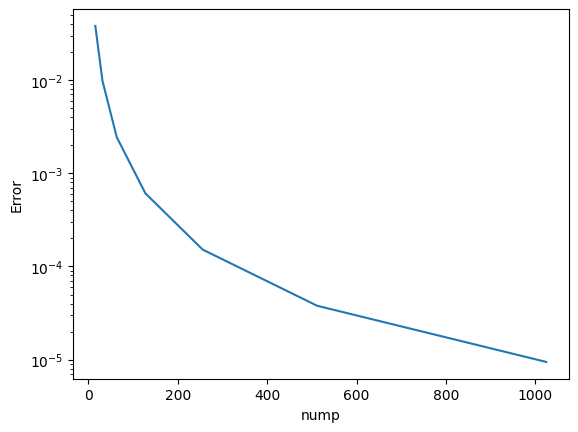

In [10]:
fig, ax = plt.subplots()
ax.semilogy(ntests, errors)
ax.set_xlabel("nump")
ax.set_ylabel("Error")
plt.show()

## 3- Improving the accuracy of the test of the quadratic order of the approximation.

To test the accuracy of the result of the previous paragraph:

1. extend the test to a larger range of number of intervals (including 2048, 4096, 8192, 16384). Make sure to use double precision variables throughout the program (meaning: all variables except the array indices).

2. then try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence.

In [11]:
#Now we add some more values to the inveral and calculate the new errors
new_errors = errors
intervals = [2048, 4096, 8192, 16384]

new_interval = ntests + intervals

for ntest in intervals:
    xx, hh, dx = get_xx_hh_dx(nump=ntest, x0=db(-4.0), xf=db(10.0))
    hp, ha = calculate_derivative(xx, hh, dx)
    new_errors.append(np.mean(np.abs(hp-ha)))

In [12]:
print(new_interval)

[16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


In [13]:
#We go into log-space
log_error = np.log10(new_errors)
log_interval = np.log10(new_interval)
#doing the polynomial fitting to degree 1.
coefficients = np.polyfit(log_interval, log_error, 1)
#Need only coefficients but create fit variable for plotting
fit = np.poly1d(coefficients)

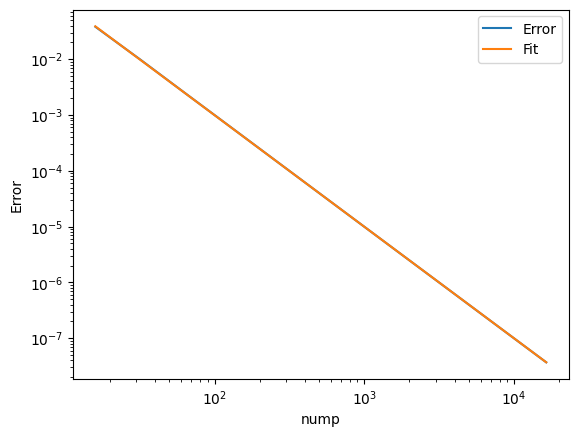

In [14]:
fig, ax = plt.subplots()
ax.loglog(ntests+intervals, new_errors, label="Error")
ax.loglog(10**(log_interval), 10**(fit(log_interval)), label="Fit")
ax.set_xlabel("nump")
ax.set_ylabel("Error")
ax.legend()
plt.show()

When $∆x$ get's small enough we get floating point errors. That's why it's not linear anymore.

When something is linear in logspace it implies that it follows a power law. 
$$
y = c x^k.
$$

$$
log(y)=log(cx^k) = log(c)+k log(x)
$$

We have found the coefficients for log(y). So we have found log(c) and k.

In [15]:
coefficients

array([-1.99989187,  0.99622582])

<span style="color:green">JMS</span>.

<span style="color:blue">Good</span>.

I have taken the mean of the absolute value between the analytical solution and the numerical solution for increased gridpoints xx called nump in the plot. Then I have taken this into logspace and done a polynomial fit to the first degree. Then plotting the coefficients we get that the first coefficient is -2, which means that this curve goes as $\Delta x ^2$. The reason the coefficient is negative is because the function is decreasing with nump.

## 4- Analytical proof of the order of convergence of the approximation for the derivative (optional)

Consider the sampling used in exercise this, assuming that the spacing between grid points is uniform, i.e., $(\Delta x)_i = \Delta x$. Write a formal Taylor expansion as follows:


$$f(x_{i+1}) = f(x_{i+1/2}) + f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{2}$$

$$f(x_{i}) = f(x_{i+1/2}) - f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{3}$$

including terms up to order $(\Delta x)^3$. Eliminating terms combining those two expressions, conclude that, as said in the previous exercise sheet, the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$ carried out there is of 2nd order.